## Volatility

In [13]:
import pandas as pd

prices = pd.read_csv('../Data/data/sample_prices.csv')
returns = prices.pct_change()
returns = returns.dropna() #eliminates NaN

In [14]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

If we do it from scratch:

In [15]:
import numpy as np
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.sum()/(returns.shape[0]-1)
volatility = np.sqrt(variance)
print(volatility)

BLUE      0.023977
ORANGE    0.079601
dtype: float64


In [18]:
returns = pd.read_csv('../Data/data/Portfolios_Formed_on_ME_monthly_EW.csv',
                    header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [19]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [20]:
columns = ['Lo 10','Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [21]:
returns = returns/100 #the other one is given as a percentage

In [22]:
returns.columns = ['SmallCap', 'LargeCap']  #we are just changing the name

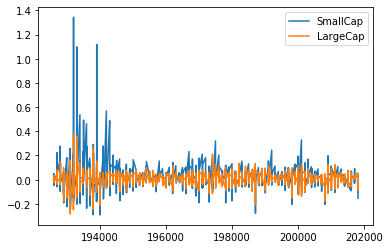

In [25]:
returns.plot()

As you can see, the small caps look much more volatile. Let's check it with the standard deviation

In [26]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

To annualize the volatility we use the following:

$$ V_{annual} = V_{month} * \sqrt{12} $$

Bear in mind, that in this case, the period is square-rooted, because we are talking about standard deviation.



In [34]:
annualized_vol = returns.std()*np.sqrt(12)
print(annualized_vol)

SmallCap    0.368193
LargeCap    0.186716
dtype: float64


Let's say that we want to obtain which constant return would offer the same results. For that, we have to do:

$$ R_{a} = (R_{m} + 1)^{n} - 1 $$

$$ R_{a} = \prod_{i=1}^{n}(R_{i}+1) - 1 $$

where n is the number of months for which we have data. The return per month is then given by:

$$ R_{m} = (\prod_{i=1}^{n}(R_{i}+1))^{\frac{1}{n}} - 1 $$

Remember that this is NOT the average monthly return. This is the return per month that, if constant, would yield the same results as the real data.

In [35]:
n_months = returns.shape[0]

return_per_month = (returns+1).prod()**(1/n_months) - 1

print(return_per_month)

SmallCap    0.012986
LargeCap    0.007423
dtype: float64


And since we have the return per month, we can also obtain the annualization:



In [36]:
annualized_ret = (return_per_month+1)**12 - 1 
print(annualized_ret)

SmallCap    0.167463
LargeCap    0.092810
dtype: float64


So we can see that small caps give almost double annualized return, but the also have double volatily. We can now check the ratio return/volatility:


In [37]:
annualized_ret/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

However, we can do something better, which is using the Sharpe ratio, which gives the excess return over the risk-free rate:

$$ S= \frac{R_{a} - R_{f}}{Vol_{a}}$$

where $$ R_{f} $$ is the risk-free rate. The risk-free rate of return is the theoretical rate of return of an investment with zero risk. The risk-free rate represents the interest an investor would expect from an absolutely risk-free investment over a specified period of time. The real risk-free rate can be calculated by subtracting the current inflation rate from the yield of the Treasury bond matching your investment duration.

If we suppose a rate of 0.03, we have that the Sharpe ratio is:

In [38]:
riskfree_rate = 0.03
sharpe_ratio = (annualized_ret-riskfree_rate)/annualized_vol
print(sharpe_ratio)

SmallCap    0.373346
LargeCap    0.336392
dtype: float64


So according to the Sharpe ratio, the Small cap performs a bit better than the Large Cap.